In [1]:
import sys
sys.path.append("../src/")

from neural_pid_controller import NeuralPidController
from bathtub import Bathtub
from cournot import CournotCompetition
from rabbits import Rabbits
from consys import ConSys
from plot_utils import plot_nn_pid

## Neural PID Controller

### Bathtub

In [ ]:
### Bathtub params:
A = 10.0      # cross-sectional area
C = A/100   # cross-sectional-drain area
H = 10.0      # initial height
g = 9.8     # gravitational constant

### ConSys params:
no_epochs = 30
timesteps_per_epoch = 20
learning_rate = 0.01
min_noise_value = -0.01
max_noise_value = 0.01

### Controller params:
hidden_layers = [16, 16, 16]
activation_funcs = ["sigmoid", "sigmoid", "sigmoid", "linear"]
min_weight_value = - 1.0
max_weight_value = 1.0

controller = NeuralPidController(hidden_layers, activation_funcs, min_weight_value, max_weight_value)
plant = Bathtub(A, C, H, g)
consys = ConSys(controller, plant, no_epochs, timesteps_per_epoch, learning_rate, min_noise_value, max_noise_value)
mse_list = consys.simulate(verbose=True)

plot_nn_pid(mse_list)


### Cournot

In [ ]:
### CournoutCompetition params:
T = 0.6   # Target profit per timestep
c_m = 0.1   # Marginal cost
q1 = 0.1   # initial quantity produced by 1
q2 = 0.3   # initial quantity produced by 2
p_max = 2.0 # maximum market price

### ConSys params:
no_epochs = 40
timesteps_per_epoch = 10
learning_rate = 0.001
min_noise_value = -0.01
max_noise_value = 0.01

### Controller params:
hidden_layers = [16, 16, 16]
activation_funcs = ["sigmoid", "sigmoid", "sigmoid", "linear"]
min_weight_value = - 0.01
max_weight_value = 0.01

controller = NeuralPidController(hidden_layers, activation_funcs, min_weight_value, max_weight_value)
plant = CournotCompetition(target_profit=T, marginal_unit_cost=c_m, own_quantity=q1, competitor_quantity=q2, maximum_price=p_max)
consys = ConSys(controller, plant, no_epochs, timesteps_per_epoch, learning_rate, min_noise_value, max_noise_value)
mse_list = consys.simulate(verbose=True)

plot_nn_pid(mse_list)


### Rabbits

In [ ]:
""" Rabbits and foxes; We will model a population of rabbits and one of foxes, where the foxes prey
on the rabbits. Rabbits are born at rate a1 and die naturally at rate a2, and die due to interaction
with foxes at rate a3. In addition, due to external effects on the rabbits' birth rate, there is a time
varying, additive component + a4 sin(a5 · t). Rabbits killed by wildlife population control is 
represented by U (the control signal).

Foxes die naturally at rate b1 and are born from interaction with rabbits at rate b2. 
There is also some noise in the birthrate of foxes, represented by the term D (disturbance).


Task: keep rabbit population stable at initial population.
We assume that wildlife population management always make sure that neither the rabbit population nor the fox population
ever gets lower than 1 individual.
"""

Epoch 0  mse:  277.442
Epoch 1  mse:  237.68144
Epoch 2  mse:  200.30002
Epoch 3  mse:  163.92908
Epoch 4  mse:  128.09721
Epoch 5  mse:  99.91589
Epoch 6  mse:  75.84261
Epoch 7  mse:  59.01295
Epoch 8  mse:  46.194263
Epoch 9  mse:  38.62687
Epoch 10  mse:  34.608944
Epoch 11  mse:  32.07736
Epoch 12  mse:  30.773746
Epoch 13  mse:  30.59915
Epoch 14  mse:  30.738012
Epoch 15  mse:  29.78101
Epoch 16  mse:  30.702799
Epoch 17  mse:  30.12599
Epoch 18  mse:  30.449402
Epoch 19  mse:  30.534876
Epoch 20  mse:  30.34409
Epoch 21  mse:  30.126356
Epoch 22  mse:  29.402918
Epoch 23  mse:  29.738398
Epoch 24  mse:  29.526724
Epoch 25  mse:  30.084595
Epoch 26  mse:  30.182606
Epoch 27  mse:  30.531607
Epoch 28  mse:  30.63325
Epoch 29  mse:  30.280745
Epoch 30  mse:  30.831968
Epoch 31  mse:  29.70995
Epoch 32  mse:  29.517576
Epoch 33  mse:  29.917322
Epoch 34  mse:  30.57173
Epoch 35  mse:  30.005787
Epoch 36  mse:  29.985483
Epoch 37  mse:  30.189894
Epoch 38  mse:  30.952686
Epoch 39  

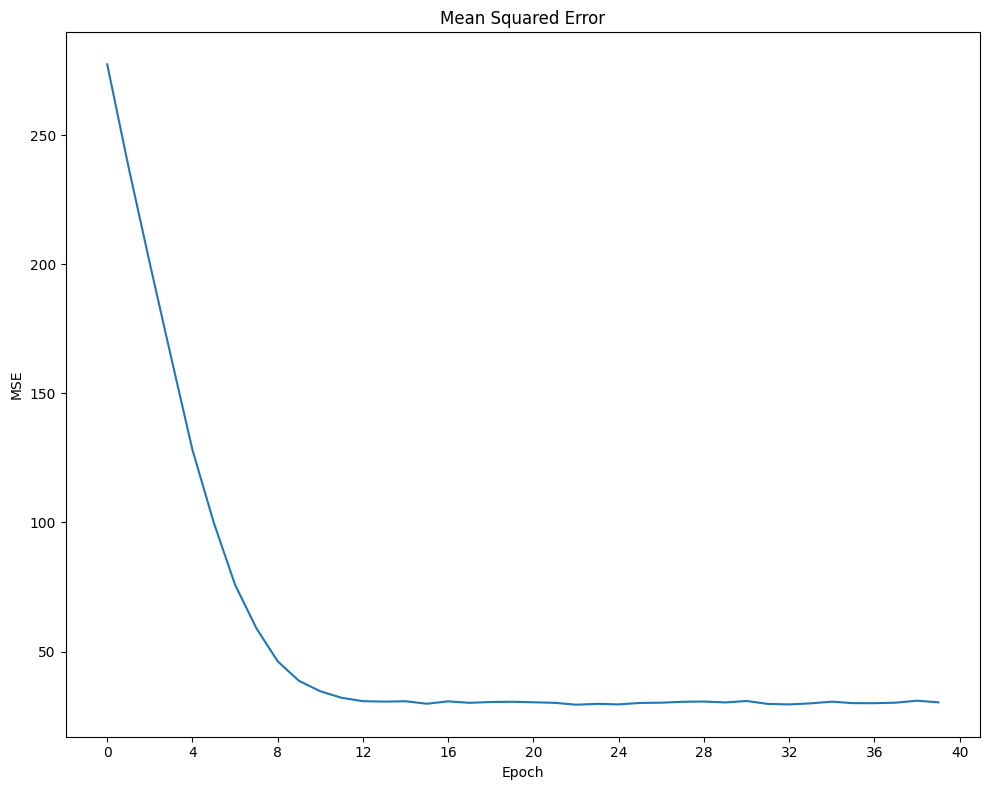

In [6]:
### Rabbit population params:
a1 = 0.35     # rabbit birth rate (originally 0.35)
a2 = 0.01     # rabbit natural death rate
a3 = 0.05     # rabbit killed by fox rate
a4 = 0.3      # rabbit external birthrate factors param 1
a5 = 0.4      # rabbit external birthrate factors param 2
b1 = 0.3      # fox natural death rate
b2 = 0.015    # fox birthrate
rabbit_start_population = 26
fox_start_population = 3

### ConSys params:
no_epochs = 40
timesteps_per_epoch = 10
learning_rate = 0.001
min_noise_value = -0.01
max_noise_value = 0.01

### Controller params:
hidden_layers = [16, 16, 16, 16, 16]
activation_funcs = ["sigmoid", "sigmoid", "sigmoid", "sigmoid", "sigmoid", "linear"]
min_weight_value = - 0.01
max_weight_value = 0.01

controller = NeuralPidController(hidden_layers, activation_funcs, min_weight_value, max_weight_value, seed=42)
plant = Rabbits(a1, a2, a3, a4, a5, b1, b2, rabbit_start_population, fox_start_population)
consys = ConSys(controller, plant, no_epochs, timesteps_per_epoch, learning_rate, min_noise_value, max_noise_value)
mse_list = consys.simulate(verbose=True)

plot_nn_pid(mse_list)
